In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv("../processed_data.csv")

In [17]:
num_clusters = range(2, 8)


/home/teki/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/teki/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/teki/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/teki/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/teki/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: T

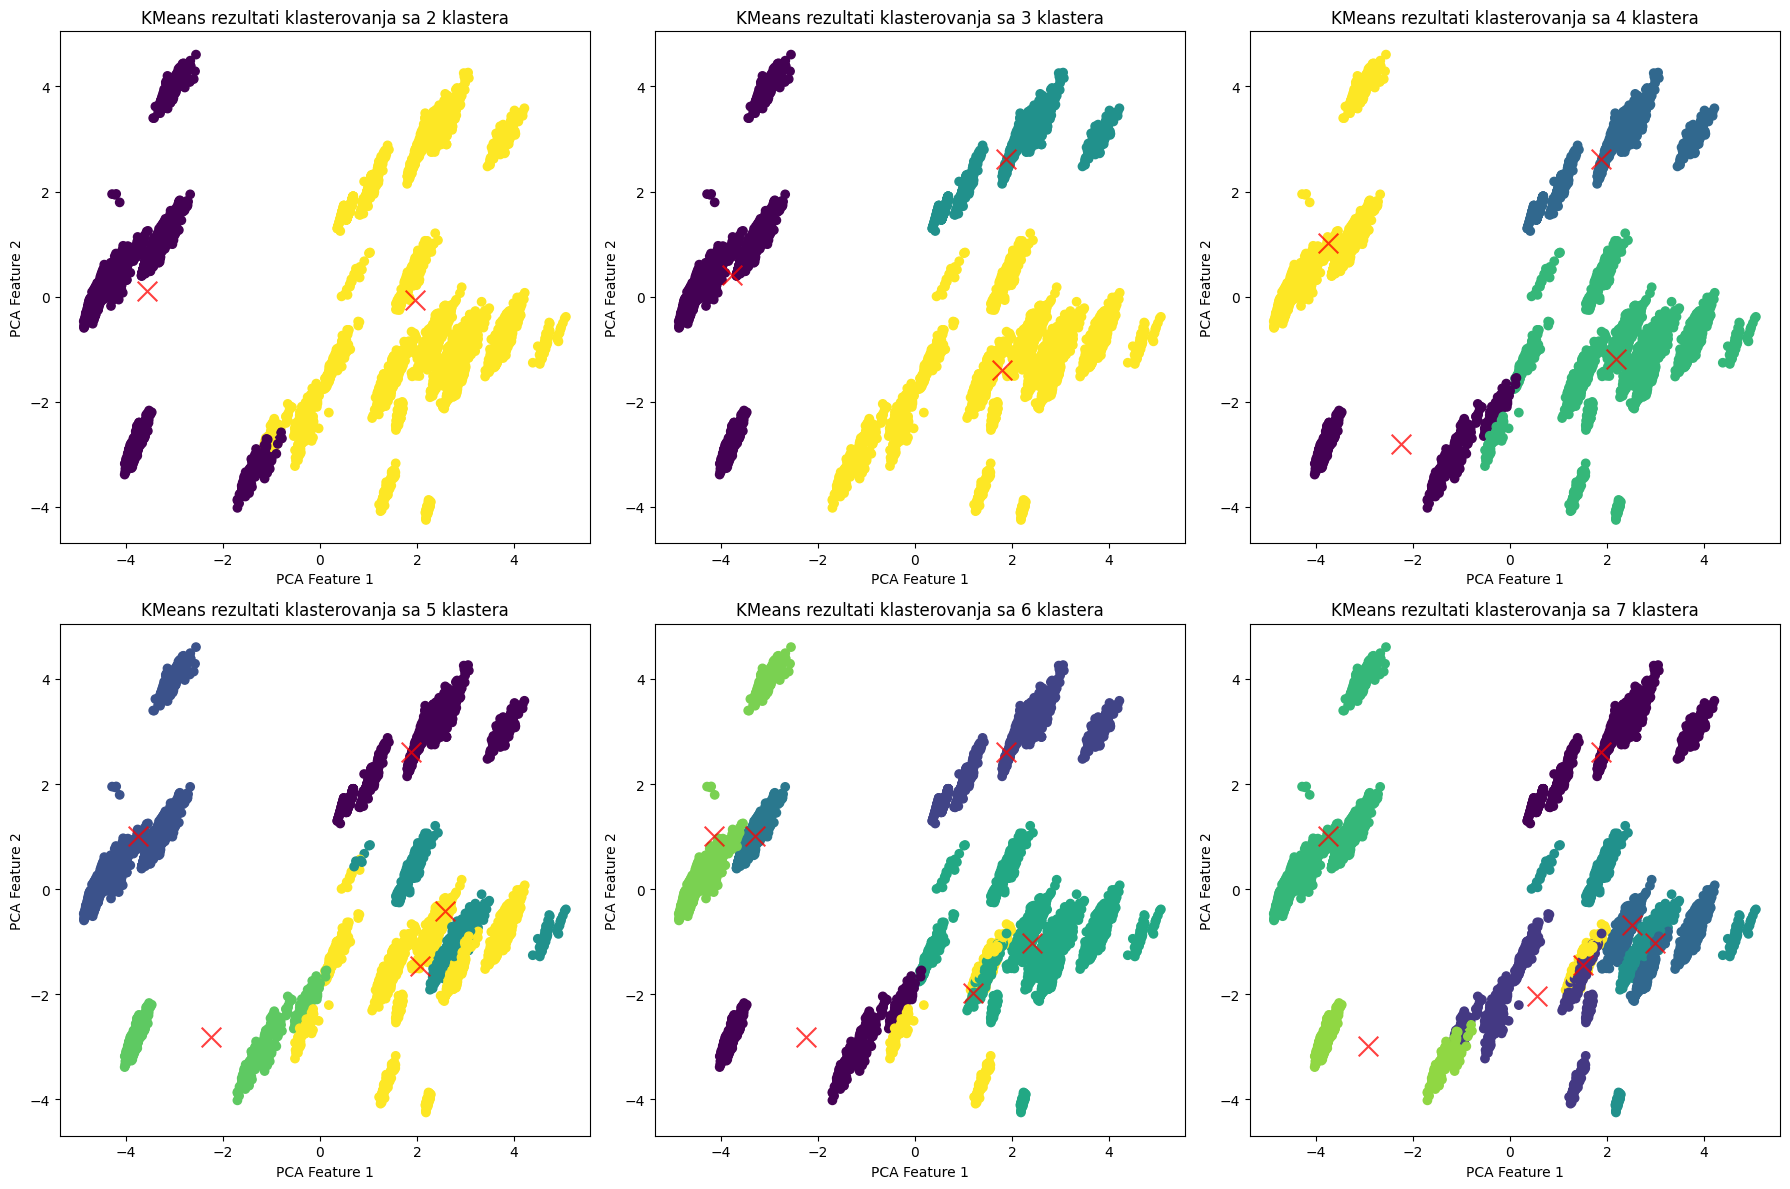

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, n_cluster in enumerate(num_clusters):
  
    kmeans = KMeans(n_clusters=n_cluster, init="k-means++", max_iter=300, random_state=42)
    kmeans.fit(data)
    
    # Predvidjanje klastera
    labels = kmeans.labels_
    
    # PCA za vise od 2 dimenzije
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        data_reduced = pca.fit_transform(data)
        ax = axes[i // 3, i % 3]
        ax.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', marker='o')
        ax.set_title(f'KMeans rezultati klasterovanja sa {n_cluster} klastera')
        ax.set_xlabel('PCA Feature 1')
        ax.set_ylabel('PCA Feature 2')
        centers = pca.transform(kmeans.cluster_centers_)
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
        pca_components = pca.components_
    else:
        ax = axes[i // 3, i % 3]
        ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
        ax.set_title(f'KMeans rezultati klasterovanja sa {n_cluster} klastera')
        ax.set_xlabel(data.columns[0])
        ax.set_ylabel(data.columns[1])
        centers = kmeans.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.tight_layout()
plt.savefig('kmeans_comparison.png', format='png', dpi=300)
plt.show()